<a href="https://colab.research.google.com/github/sanjprasad/Final-Project/blob/main/Final_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Firstly, to start off the project I can begin with some setup by importing in the various libraries that will be needed. 

In [ ]:
from pandas.core.window.indexers import VariableOffsetWindowIndexer
#importing pandas and numpy the standard libraries
import pandas as pd
import numpy as np

#import standard classification tools from sklearn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

#importing all the other libraries
import sys
import csv
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import collections
import plotly.graph_objects as go

#visualization imports
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

template = "ggplot2"

# Data Preparation

We can import the data and take an initial look at it. The first thing to notice is that there is a column numbered to keep track of the 64 different samples and another column with the type of tissue for each sample. 

In [ ]:
#importing the data and taking a cursory glance at it
data = pd.read_table('/content/Leukemia_GSE9476.csv',sep=',',header=(0)) 
data


,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,61,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,62,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,63,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


We can drop the sample column as it's unneeded as shown below.

In [ ]:
#need to drop the samples column because it's unneeded
data = data.drop(['samples'], axis =1)
data

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,Bone_Marrow_CD34,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,4.664924,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,Bone_Marrow_CD34,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,5.171835,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,Bone_Marrow_CD34,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,4.775709,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,Bone_Marrow_CD34,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,4.829844,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,Bone_Marrow_CD34,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,5.245049,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,PBSC_CD34,7.686106,6.856961,6.822222,8.849700,4.440703,8.456949,5.408897,4.708615,4.691377,...,4.969400,7.016576,12.997293,12.828832,5.084120,4.531087,3.884230,3.619301,4.108490,4.070028
60,PBSC_CD34,7.816168,6.875124,6.532324,8.827857,4.515457,8.450286,5.482797,4.667874,4.968642,...,4.826255,6.577223,12.990305,12.855352,5.260451,4.568651,3.927693,3.634879,4.112277,4.064780
61,PBSC_CD34,7.863092,6.896242,6.630690,8.775139,4.458048,8.664517,5.577298,4.853996,4.815901,...,5.065816,6.583261,12.786121,12.588852,5.451940,4.739944,4.010427,3.668713,4.162220,4.102264
62,PBSC_CD34,7.900992,6.787515,6.642927,8.856187,4.499548,9.188459,5.471110,4.637444,5.036441,...,4.985061,6.815527,13.020089,12.824868,5.459571,4.602105,4.019624,3.570563,4.141371,4.102641


Next, we can start doing some data manipulaton and pull the expression values and corresponding class into two variables.

In [ ]:
x = data.iloc[:, 1:].values #pulling the expression values
y = data.iloc[:, 0].values #pulling the sample class

x,y #checking to make sure I have the right information pulled for both variable

(array([[ 7.745245  ,  7.81121008,  6.47791635, ...,  3.65669312,
          4.16062155,  4.13924885],
        [ 8.08725201,  7.24067331,  8.58464841, ...,  3.7925346 ,
          4.20441384,  4.12269984],
        [ 7.79205558,  7.54936776, 11.05350405, ...,  3.63571499,
          4.17419912,  4.06715189],
        ...,
        [ 7.86309208,  6.89624162,  6.63068969, ...,  3.66871266,
          4.16222013,  4.1022645 ],
        [ 7.90099218,  6.78751502,  6.64292725, ...,  3.57056287,
          4.14137082,  4.10264116],
        [ 8.00448759,  6.65743335,  6.70559658, ...,  3.63836663,
          4.15684155,  4.17986705]]),
 array(['Bone_Marrow_CD34', 'Bone_Marrow_CD34', 'Bone_Marrow_CD34',
        'Bone_Marrow_CD34', 'Bone_Marrow_CD34', 'Bone_Marrow_CD34',
        'Bone_Marrow_CD34', 'Bone_Marrow_CD34', 'Bone_Marrow',
        'Bone_Marrow', 'Bone_Marrow', 'Bone_Marrow', 'Bone_Marrow',
        'Bone_Marrow', 'Bone_Marrow', 'Bone_Marrow', 'Bone_Marrow',
        'Bone_Marrow', 'AML', 'AML', '

We can then look and see the number of tissue types (or classes) and find the unique values. 

In [ ]:
#seeing the actual classes with this data
classes = np.unique(y)
classes

array(['AML', 'Bone_Marrow', 'Bone_Marrow_CD34', 'PB', 'PBSC_CD34'],
      dtype=object)

# Data Visualization

Following this to start visualization, I decided to examine the sample distribution to see how many samples are in each category.

In [ ]:
#how many 'AML' samples are there in the original dataset?
print(len(y[y == 'AML']))

26


In [ ]:
#how many 'Bone_Marrow' samples are there in the original dataset?
print(len(y[y == 'Bone_Marrow']))

10


In [ ]:
#how many 'Bone_Marrow_CD34' samples are there in the original dataset?
print(len(y[y == 'Bone_Marrow_CD34']))

8


In [ ]:
#how many 'PB' samples are there in the original dataset?
print(len(y[y == 'PB']))

10


In [ ]:
#how many 'PBSC_CD34' samples are there in the original dataset?
print(len(y[y == 'PBSC_CD34']))

10


Below I created a heatmap to visualize the data. From the heatmap, it's clear that some genes have much more expression than others and that it's consistent between all the samples (appears to be more of a straight line). Some genes have less consistent expression levels between samples (indicated by dotted lines or chunks of different colors in one line). 

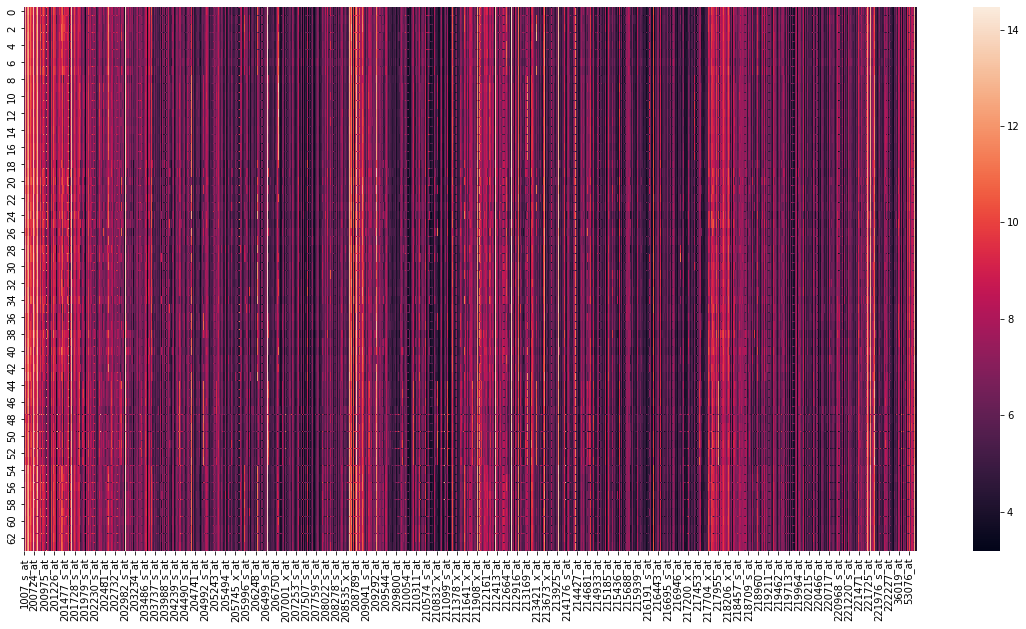

In [ ]:
#increasing the size of the plot
data3 = data.drop("type", axis = 1)
plt.figure(figsize=(20, 10))

# making the heatmap
sns.heatmap(data3)
plt.show()

# PCA

Below, I conducted PCA to look at how the data looks with all the different subclasses of the normal tissue vs cancer tissue.

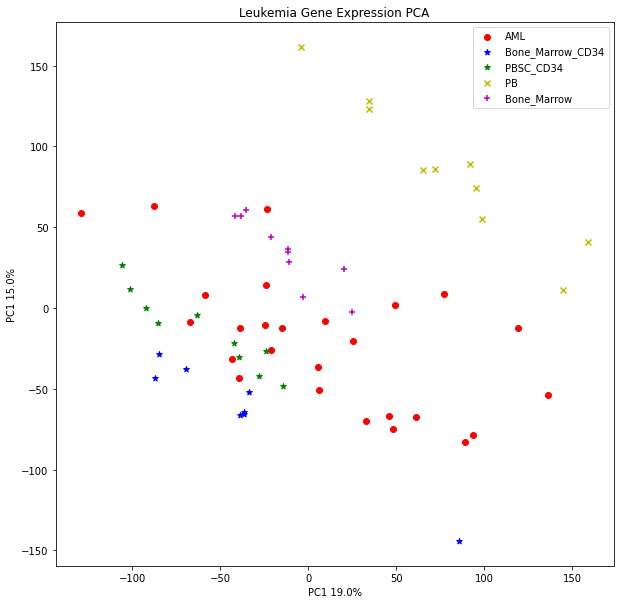

In [ ]:
scaled = StandardScaler()
scaled.fit(x)
scaled_data = scaled.transform (x)
pca = PCA(n_components=2)
pca.fit(scaled_data)
xpca = pca.transform(scaled_data)
PC1 = 0 
PC2 = 1
plt.figure(figsize=(10,10))
for i in range(0, xpca.shape[0]):
  if 'AML' in y[i]:
    c1 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "r", marker = "o")
  elif 'Bone_Marrow_CD34' in y[i]:
    c2 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "b", marker = "*")
  elif 'PBSC_CD34' in y[i]:
    c3 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "g", marker = "*")
  elif 'PB' in y[i]:
    c4 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "y", marker = "x")
  elif 'Bone_Marrow' in y[i]:
    c5 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "m", marker = "+")
  
plt.legend([c1, c2, c3, c4, c5], ['AML', 'Bone_Marrow_CD34', 'PBSC_CD34', 'PB', 'Bone_Marrow'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%')
plt.ylabel(f'PC1 {round(pca.explained_variance_ratio_[1],2)*100}%')
plt.title('Leukemia Gene Expression PCA')
plt.show()

We see in the plot that all of the normal tissue is nicely clustered together and so is the cancer tissue although it's spread out more throughout the plot. However, only 34% of the variance is explained in the plot. 

Below, I can calculate to see how many PCA components are needed to explain 80% of the variance. 

In [ ]:
pca = PCA(n_components=0.8)
result = pca.fit_transform(scaled_data)
print(result.shape)

(64, 22)


We see that 22 components are needed to explain 80% of the variance indicating that autoencoders might need to be done on the data.

As there is a  difference in the number of samples between the AML samples and the different subclasses of the normal samples, I decided to also combine the two different categories of CD34 cells into one variable with both. Additionally, CD34+ cells should be one general category as I'm not as interested in looking at the differences between the two. 

Below, I created a function that could be applied to the dataset in order to make this change and combine the two class types into one. 

In [ ]:
#creating a function to deal with dataset
def cleanData(row):
    if row["type"] == "Bone_Marrow_CD34":
        # if this is CD34 subclass, change the value to "CD34"
        row["type"] = "CD34"

    elif row["type"] == "PBSC_CD34":
        # if this is CD34 subclass, change the value to "CD34"
        row["type"] = "CD34"

    #the below is to make sure the other types stay the same just in case
    elif row["type"] == "Bone_Marrow":
        row["type"] = "Bone_Marrow"

    elif row["type"] == "AML":
        row["type"] = "AML"

    elif row["type"] == "PB":
        row["type"] = "PB"

    return row

# applying the function to the data
data2 = data.apply(cleanData, axis=1)

In [ ]:
#updating the x, y variables and checking the classes after changing the type variable
x2 = data2.iloc[:, 1:].values #pulling the expression values
y2 = data2.iloc[:, 0].values #pulling the sample class

#seeing the actual classes with this data
classes2 = np.unique(y2)
classes2

array(['AML', 'Bone_Marrow', 'CD34', 'PB'], dtype=object)

I ran PCA on this updated data as well to see if there was a differnce in the plot created. 

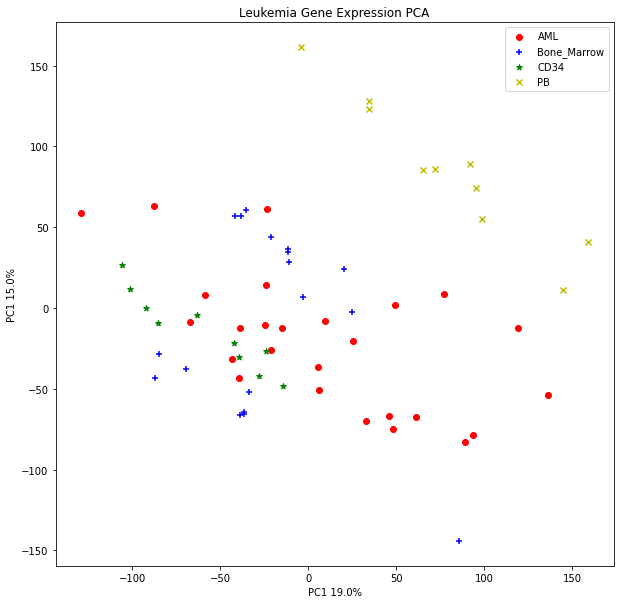

In [ ]:
scaled = StandardScaler()
scaled.fit(x2)
scaled_data2 = scaled.transform (x2)
pca = PCA(n_components=2)
pca.fit(scaled_data2)
xpca = pca.transform(scaled_data2)
PC1 = 0 
PC2 = 1
plt.figure(figsize=(10,10))
for i in range(0, xpca.shape[0]):
  if 'AML' in y[i]:
    c1 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "r", marker = "o")
  elif 'Bone_Marrow' in y[i]:
    c2 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "b", marker = "+")
  elif 'CD34' in y[i]:
    c3 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "g", marker = "*")
  elif 'PB' in y[i]:
    c4 = plt.scatter(xpca[i, PC1], xpca[i, PC2], c = "y", marker = "x")

  
plt.legend([c1, c2, c3, c4], ['AML', 'Bone_Marrow', 'CD34', 'PB'])
plt.xlabel(f'PC1 {round(pca.explained_variance_ratio_[0],2)*100}%')
plt.ylabel(f'PC1 {round(pca.explained_variance_ratio_[1],2)*100}%')
plt.title('Leukemia Gene Expression PCA')
plt.show()

In [ ]:
pca = PCA(n_components=0.8)
result = pca.fit_transform(scaled_data2)
print(result.shape)

(64, 22)


We see above that only 34% of variance is explained still and that 22 PCA components are needed to explain 80% of the variance. There is still some nice clustering being done but we will still need to do autoencoders. 


We can now go back to manipulating the original data.

# Using LazyPredict
We can use LazyPredict to determine the best classification method for this data

In [ ]:
!pip uninstall scikit-learn -y -q
!pip install scikit-learn==0.24 -q

     |████████████████████████████████| 24.9 MB 1.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
warnings.filterwarnings('ignore')

!pip install lazypredict -q

In [ ]:
#import necessary modules
import time 
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier,LazyRegressor

#Create a lazyClassifier model
model=LazyClassifier(verbose=0,predictions=True)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0)

# fit and train the model 
start_time_1=time.time()
models_c,predictions_c=model.fit(X_train, X_test, y_train, y_test)
end_time_1=time.time()

100%|██████████| 29/29 [01:22<00:00,  2.85s/it]


In [ ]:
fig = px.bar(models_c[['Time Taken', 'F1 Score','Accuracy']], barmode='group', template=template)
fig.update_layout(width=1200, height=700, template=template, title="Classification Report")
fig.show()

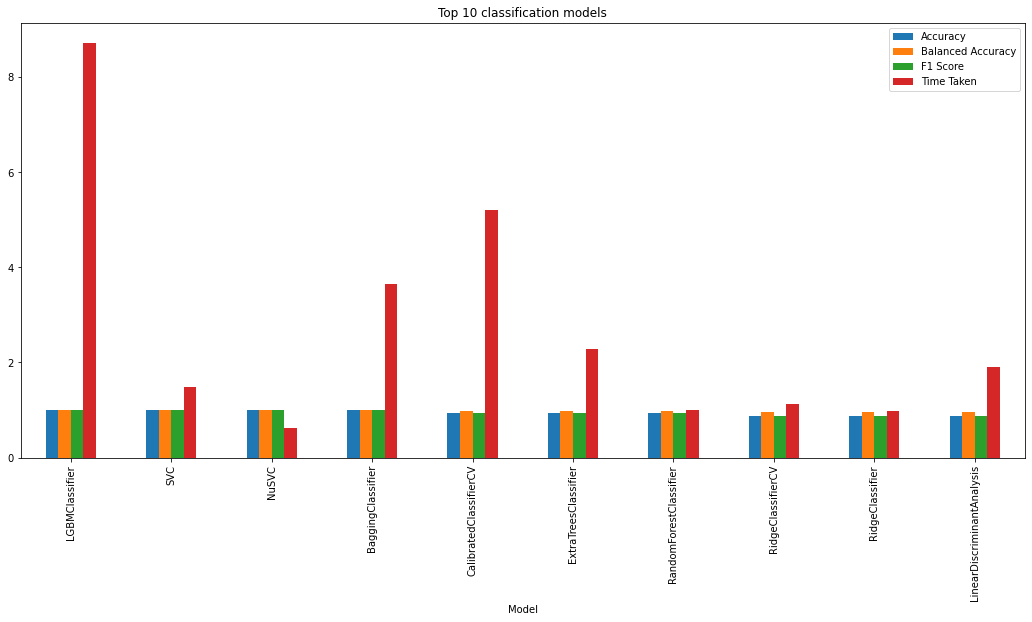

In [ ]:
models_c.iloc[0:10].plot.bar(figsize = (18,8), title="Top 10 classification models");

Above, we see that RandomForest is the one method we discussed heavily in class that is one of the top ten classification methods with this data. In addition, the parameters for it are fairly good with little time taken compared to the first model's time taken. 

Thus, we will use RandomForest to make a model. 

# Creating a Model with RandomForest

Below, I create a test and train set of data with the test data having a size of 100%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.25, stratify=y)
display("Train data", collections.Counter(y_train))
display("Test data", collections.Counter(y_test))

'Train data'

Counter({'PBSC_CD34': 7,
         'Bone_Marrow': 8,
         'AML': 20,
         'Bone_Marrow_CD34': 6,
         'PB': 7})

'Test data'

Counter({'AML': 6,
         'Bone_Marrow_CD34': 2,
         'PB': 3,
         'PBSC_CD34': 3,
         'Bone_Marrow': 2})

I then can do RandomForestClassifier on the data and we see the model produced has a 100% accuracy rate! The training data being used isn't a large enough amount to result in overfitting as well. 

In [ ]:
model = RandomForestClassifier(n_estimators=500, bootstrap=True)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
c_matrix = confusion_matrix(y_test,predictions)

CM_df = pd.DataFrame(c_matrix, columns=classes, index=classes)

cr = classification_report(y_test,predictions, output_dict=True)
model_accuracy = accuracy_score(y_test, predictions)

model_accuracy 

1.0

Below, we can look at the classification report of this method.

In [ ]:
clsf_report = pd.DataFrame(cr).transpose()
n_classes = len(classes)
clsf_report1 = clsf_report[0:n_classes]

fig = px.bar(clsf_report1, barmode='group', template=template)
fig.update_layout(width=700, height=700, template=template, title="Classification Report")
fig.show()

Precision is the ratio of true positives to total positives and essentially refers to accuracy, so a higher precision score indicates a low rate of false positives. 

Recall is the ratio of true positives to all the actual observations (so total true positives and false negatives) and essentially refers to sensitivity of the model. 

F1 score is the weighted average of precision and recall so it takes false positives and false negatives into account in the score. F1 score is one of the most important parameter as it can be more useful than precision. 

Support is the number of occurrences of each class.

We see that all the parameters, except support, are 1 for each of the types of tissue. The classification method worked well!

In [ ]:
heat = go.Heatmap(z = c_matrix, x=CM_df.index,
                  y=CM_df.columns,
                  showscale = False,
                  text=CM_df,
                  texttemplate="%{text}",
                  textfont={"size":10})

fig = go.Figure(heat)
fig.update_layout(width=700, height=700, template=template, title="Confusion Matrix")
fig.show()


Above, I made a confusion matrix and we see visually that the model did a great job of classifying the samples as there is 100% accuracy.




# Feature Selection

We can now move onto feature selection to see what genes were significant.

In [ ]:
features = data.columns[1:].values
features

array(['1007_s_at', '1053_at', '117_at', ..., 'AFFX-TrpnX-3_at',
       'AFFX-TrpnX-5_at', 'AFFX-TrpnX-M_at'], dtype=object)

In [ ]:
import plotly.express as px
features = data.columns[1:].values

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features)

RF_df = pd.DataFrame(forest_importances.sort_values(ascending=False))
RF_df.columns = ['Feature']

#plot feature significance
fig = px.bar(RF_df[0:20], template=template)
fig.update_layout(width=1000, height=700, template=template, title="Top 20 Features by Significance")
fig.show()

The top 5 significant genes were 212372_at, 219737_s_at, 213122_at, 205049_s_at, and 205899_at in this classification. These correspond to MYH10, PCDH9, TSPYL5, CD79A and CCNA1. Looking at the top 5 genes, I noticed that 205899_at which corresponds to CCNA1 was found in the publication to be related to AML specific expression changes.




# Autoencoders

In [ ]:
def train_auto_test(activation_type, encoding_dim, opt):

  ncol = X_train.shape[1]
  input_dim = Input(shape = (ncol, ))

  # Encoder Layers
  encoded = Dense(500, activation = activation_type)(input_dim)
  encoded = Dropout(0.5)(encoded) #DROUPOUT
  encoded = Dense(200, activation = activation_type)(encoded)
  encoded = Dense(150, activation = activation_type)(encoded)
  encoded = Dense(125, activation = activation_type)(encoded)
  decoded = Dense(100, activation = activation_type)(encoded)
  encoded = Dense(encoding_dim, activation = activation_type)(encoded) # BOTTLENECK LAYER

  # Decoder Layers
  decoded = Dense(100, activation = activation_type)(decoded)
  decoded = Dense(200, activation = activation_type)(decoded)
  decoded = Dense(300, activation = activation_type)(decoded)
  decoded = Dense(400, activation = activation_type)(decoded)
  decoded = Dense(500, activation = activation_type)(decoded)
  decoded = Dense(ncol, activation = activation_type)(decoded)

  # Combine Encoder and Deocder layers
  autoencoder = Model(inputs = input_dim, outputs = decoded)

  # Compile the Model
  autoencoder.compile(optimizer = opt, loss = 'binary_crossentropy', metrics=['mae'])
  autoencoder.fit(X_train, X_train, epochs = 50,verbose=0, batch_size = 50, shuffle = True, validation_data = (X_test, X_test))
  encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
  encoded_input = Input(shape = (encoding_dim, ))

  #print(history.history.keys())
  # summarize history for accuracy
  plt.plot(autoencoder.history.history['mae'])
  plt.plot(autoencoder.history.history['val_mae'])
  plt.title('Mean Absolute Error')
  plt.ylabel('MAE')
  plt.xlabel('epoch cycles')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Prediction
  encoded_train = pd.DataFrame(encoder.predict(X_train))
  encoded_train = encoded_train.add_prefix('feature_')
  encoded_test = pd.DataFrame(encoder.predict(X_test))
  encoded_test = encoded_test.add_prefix('feature_')

  encoded_train['id'] = y_train
  encoded_train = encoded_train.set_index('id')

  encoded_test['id'] = y_test
  encoded_test = encoded_test.set_index('id')

  X_encoded = pd.concat([encoded_train,encoded_test])

  #PCA
  pca = PCA(n_components=0.80)
  projected = pca.fit_transform(X_encoded.iloc[:, 1:])
  y = list(X_encoded.index)
  le = preprocessing.LabelEncoder()
  le.fit(classes)
  y_encod = le.transform(y)

  plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
  plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
  plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
  #plt.colorbar();
  cb = plt.colorbar(ticks=range(4), label='Tumor Type')
  cb.ax.set_yticklabels(classes)
  plt.show()

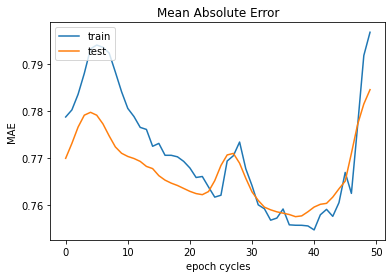

1/1 [==============================] - 0s 36ms/step


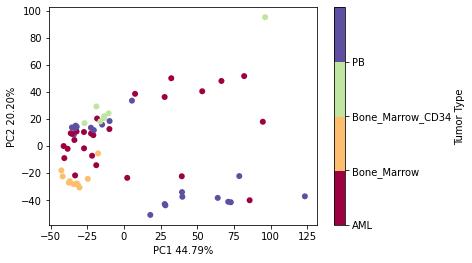

In [ ]:
train_auto_test('relu', 50, 'adam')

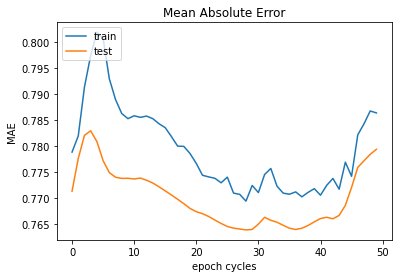

1/1 [==============================] - 0s 37ms/step


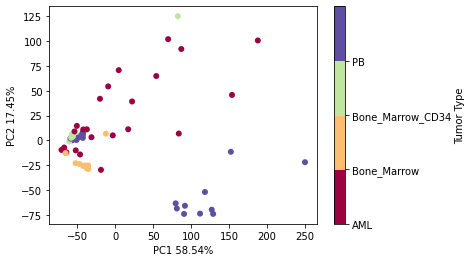

In [ ]:
train_auto_test('relu', 100, 'adam')

We see from the above graphs that 100 features results in 75% variance explained, which is much closer to the threshold of 80%. 

Thus, using a 100 features better explains the variance. Additionally, it looks like we can drop the epochs down to around 40 epochs as in both the graphs (regardless of number of features), the mean absolute error was low for both the training and testing data. This means that we're not overfitting on the train data and the error is consistent on both train and test data. Looking at the PCA plot, we see some nice grouping again for all the classes. 

